In [6]:
import numpy as np                                      # importing necessary packages
import math 
import hashlib
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
import matplotlib.pyplot as plt

The hash of the Root Node is :
 f2793e12c939c6c12a3989c11da7544e271354ae6fe7ead24dc50a71b37b4150


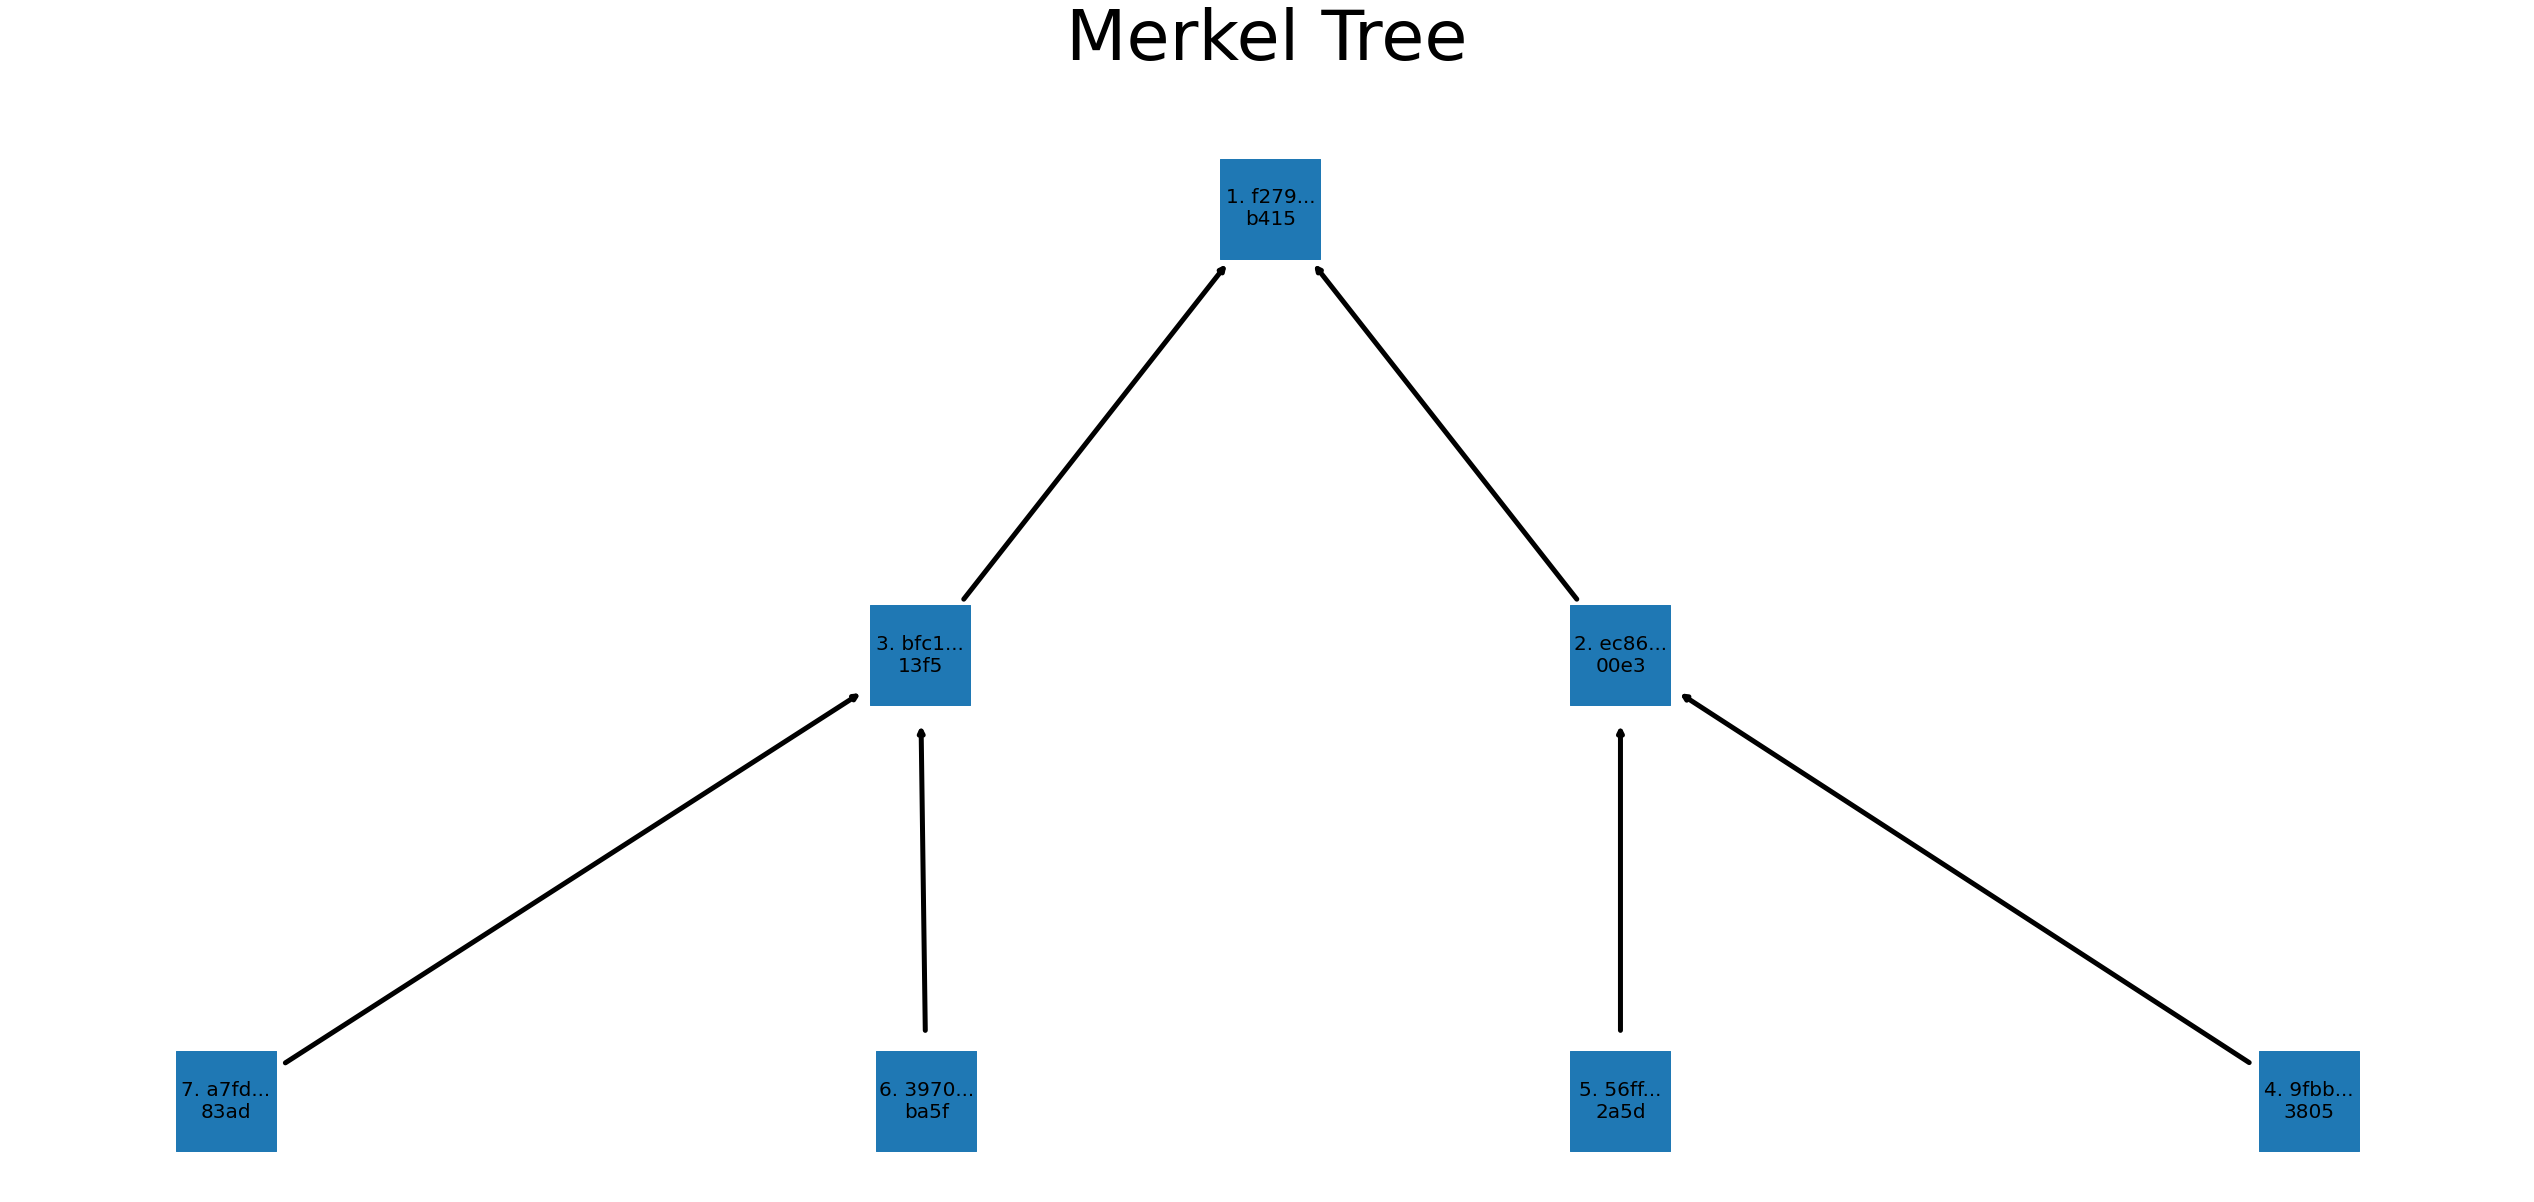

In [20]:
class node:                                                 # denoting each node in the tree 
    def __init__(self,value,right=None,left=None,pos=None): 
        self.value = value                                  # value of the node
        self.right = right                                  # right and left node of the tree
        self.left = left
        self.pos = pos                                      # number to recognise a node in the tree
    
    def get_pos(self):                                      # method to get the pos
        return self.pos
    
    def get_value(self):                                    # method to get the value
        return self.value
    
# function for calculating the depth of the tree (after the addition of copied datas)
def tree_depth(nos_data):                                   
    return math.ceil(math.log2(nos_data))

# function to hash two datas (data1 and data2)
def hash_data(data1,data2=""):                               
    final_data = data1 + data2
    hashed_data = hashlib.sha256(final_data.encode()).hexdigest()
    return hashed_data

# function to calculate total number of nodes in the three
# ( sum of heomteric progression with the initial term 1 and 
#common ratio - 2 ( since each depth has 2 times the nodes in previous level ) 
# for depth number of terms   )

def total_nodes(depth):
    return -(1-2**depth)

# function to get the name of the nodes ( will be used in the tree visualisation )
def name(node_value,pos):
    final_name = str(pos)+". "+node_value[0:4]+"..."+"\n"+node_value[59:63]
    return final_name

# function to construct the merkle tree
def construct_merkle_tree(datas,show=None):
    G = nx.DiGraph()              # graph to draw the tree                              
    
    # create the nodes using the datas provided
    nodes_in_current_level = [node(data) for data in datas]  
    
    # make the number of datas a integer power of 2 if it is not ( by copying the last data ) 
    if math.log2(len(datas))%1!=0:                                   
        add_nodes = 2**math.ceil(math.log2(len(datas))) - len(datas)
        while(add_nodes>0):
            nodes_in_current_level.append(node(datas[len(datas)-1]))
            add_nodes = add_nodes-1
    
    # calculating depth and total nodes
    depth = tree_depth(len(datas)) 
    tot = total_nodes(depth)
    pos = tot
    
     # creating nodes at each level
    for i in range(0,depth):             
         # number of nodes in each level
        num_nodes = 2**(depth-i)                                        
        nodes_in_next_level = []
        
        # traversing each node in current level
        for j in range(0,len(nodes_in_current_level),2):                 
            node_1 = nodes_in_current_level[j]
            node_2 = nodes_in_current_level[j+1]
            
            # hash the two values to get the node at the next level
            hashed_value = hash_data(f"{node_1.value}{node_2.value}")
            new_node = node(hashed_value,node_1,node_2,pos)              # make the node at next level
            
            # for each level except the first iteration ( the first level is created at the first iteration)
            if i>0:    
                
                # add the edge connecting the node and its children into the graph
                G.add_edge(name(node_1.get_value(),node_1.get_pos()),name(new_node.get_value(),new_node.get_pos()))
                G.add_edge(name(node_2.get_value(),node_2.get_pos()),name(new_node.get_value(),new_node.get_pos()))
            
            pos=pos-1                                                    # number to identify each node    
            nodes_in_next_level.append(new_node)                         # append the new node to next level
        
        # set the next level as current level ( move to the next level )
        nodes_in_current_level = nodes_in_next_level                     
    
    # Root is the Root of the tree
    Root = nodes_in_next_level[0]
    
    if show==True:                                                        # tree is to be printed
        plt.figure(1,figsize=(5*len(datas),5*depth))                      # set the figure size
        plt.suptitle("Merkel Tree\n",fontsize=70,y=1.1)
        # find the positions such that the nodes represent a tree
        positions = graphviz_layout(G,prog="dot")                 
        
        # reflect the nodes about x axis such that root is at the top
        positions = {node: (x,-y) for (node,(x,y)) in positions.items()}
        
        # draw the tree
        
        nx.draw(G,positions,with_labels=True,font_size=20,width=5,node_size=10000,node_shape='s')
    
    # return the root node
    return Root 
           
datas = ["transac1","transac2","transac3","transac4","transac5","transac6","transac7"]
print("The hash of the Root Node is :\n",construct_merkle_tree(datas,show=True).value)
